<a href="https://colab.research.google.com/github/Mac1211/Assign_2/blob/main/EV_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
# Load data
data1 = pd.read_csv('2w,3w.csv')
data2 = pd.read_csv('different distribution.csv')
data3 = pd.read_csv('electric and non.csv')
data4 = pd.read_csv('statewise.csv')

In [4]:
# Concatenate data into a single DataFrame
data = pd.concat([data1, data2, data3, data4], ignore_index=True)

In [5]:
data.head()

,Sl. No.,Segment,Total Claim Incentive Approved in 2022 (January to December 2022),Vehicle Category,2018 - Total,2018 - EV,2018 - %,2019 - Total,2019 - EV,2019 - %,...,2023 (Till 01-08-2023) - EV,2023 (Till 01-08-2023) - %,Sl.No.,State/UT,Electric,Non-electric,Sl. No,Till date State wise - Total Number of Vehicles Registered,Till date State wise - Total Vehicle Registered as Electric,Proportion of Electric Vehicle
0,1,e-2w,1280.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,e-3w,168.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,e-4w,55.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,e-buses,364.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Total,Total,1868.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Handle missing values (numeric columns with mean, non-numeric with 'missing')
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = data.select_dtypes(exclude=['float64', 'int64']).columns

data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())
data[non_numeric_cols] = data[non_numeric_cols].fillna('missing')

In [8]:
data[numeric_cols]

,Total Claim Incentive Approved in 2022 (January to December 2022),2018 - Total,2018 - EV,2018 - %,2019 - Total,2019 - EV,2019 - %,2020 - Total,2020 - EV,2020 - %,...,2022 - EV,2022 - %,2023 (Till 01-08-2023) - Total,2023 (Till 01-08-2023) - EV,2023 (Till 01-08-2023) - %,Electric,Non-electric,Till date State wise - Total Number of Vehicles Registered,Till date State wise - Total Vehicle Registered as Electric,Proportion of Electric Vehicle
0,1280.070,4861138.6,25791.0,2.93,4622806.4,33080.4,3.652,3529227.2,24561.6,4.62,...,203451.6,12.238,2481485.6,166486.8,12.416,161746.571429,1.974496e+07,1.942906e+07,1.568011e+05,0.667143
1,168.930,4861138.6,25791.0,2.93,4622806.4,33080.4,3.652,3529227.2,24561.6,4.62,...,203451.6,12.238,2481485.6,166486.8,12.416,161746.571429,1.974496e+07,1.942906e+07,1.568011e+05,0.667143
2,55.170,4861138.6,25791.0,2.93,4622806.4,33080.4,3.652,3529227.2,24561.6,4.62,...,203451.6,12.238,2481485.6,166486.8,12.416,161746.571429,1.974496e+07,1.942906e+07,1.568011e+05,0.667143
3,364.390,4861138.6,25791.0,2.93,4622806.4,33080.4,3.652,3529227.2,24561.6,4.62,...,203451.6,12.238,2481485.6,166486.8,12.416,161746.571429,1.974496e+07,1.942906e+07,1.568011e+05,0.667143
4,1868.560,4861138.6,25791.0,2.93,4622806.4,33080.4,3.652,3529227.2,24561.6,4.62,...,203451.6,12.238,2481485.6,166486.8,12.416,161746.571429,1.974496e+07,1.942906e+07,1.568011e+05,0.667143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,747.424,4861138.6,25791.0,2.93,4622806.4,33080.4,3.652,3529227.2,24561.6,4.62,...,203451.6,12.238,2481485.6,166486.8,12.416,161746.571429,1.974496e+07,3.721330e+05,3.450000e+02,0.090000
76,747.424,4861138.6,25791.0,2.93,4622806.4,33080.4,3.652,3529227.2,24561.6,4.62,...,203451.6,12.238,2481485.6,166486.8,12.416,161746.571429,1.974496e+07,3.626246e+06,4.825000e+04,1.330000
77,747.424,4861138.6,25791.0,2.93,4622806.4,33080.4,3.652,3529227.2,24561.6,4.62,...,203451.6,12.238,2481485.6,166486.8,12.416,161746.571429,1.974496e+07,4.394323e+07,5.566290e+05,1.270000
78,747.424,4861138.6,25791.0,2.93,4622806.4,33080.4,3.652,3529227.2,24561.6,4.62,...,203451.6,12.238,2481485.6,166486.8,12.416,161746.571429,1.974496e+07,1.502062e+07,6.711100e+04,0.450000


In [14]:
data.columns

Index(['Sl. No.', 'Segment',
       'Total Claim Incentive Approved in 2022 (January to December 2022)',
       'Vehicle Category', '2018 - Total', '2018 - EV', '2018 - %',
       '2019 - Total', '2019 - EV', '2019 - %', '2020 - Total', '2020 - EV',
       '2020 - %', '2021 - Total', '2021 - EV', '2021 - %', '2022 - Total',
       '2022 - EV', '2022 - %', '2023 (Till 01-08-2023) - Total',
       '2023 (Till 01-08-2023) - EV', '2023 (Till 01-08-2023) - %', 'Sl.No.',
       'State/UT', 'Electric', 'Non-electric', 'Sl. No',
       'Till date State wise - Total Number of Vehicles Registered',
       'Till date State wise - Total Vehicle Registered as Electric',
       'Proportion of Electric Vehicle'],
      dtype='object')

In [9]:
# Identify categorical and numerical features
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

In [10]:
# Preprocess categorical features
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [11]:
# Preprocess numerical features (no transformation needed)
numerical_transformer = 'passthrough'

In [12]:
# Combine categorical and numerical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

In [17]:
data.columns

Index(['Sl. No.', 'Segment',
       'Total Claim Incentive Approved in 2022 (January to December 2022)',
       'Vehicle Category', '2018 - Total', '2018 - EV', '2018 - %',
       '2019 - Total', '2019 - EV', '2019 - %', '2020 - Total', '2020 - EV',
       '2020 - %', '2021 - Total', '2021 - EV', '2021 - %', '2022 - Total',
       '2022 - EV', '2022 - %', '2023 (Till 01-08-2023) - Total',
       '2023 (Till 01-08-2023) - EV', '2023 (Till 01-08-2023) - %', 'Sl.No.',
       'State/UT', 'Electric', 'Non-electric', 'Sl. No',
       'Till date State wise - Total Number of Vehicles Registered',
       'Till date State wise - Total Vehicle Registered as Electric',
       'Proportion of Electric Vehicle', '2022 - EV_norm'],
      dtype='object')

In [21]:
# Define the factors and their weights
factors = {
    '2022 - EV': 0.3,
    'Proportion of Electric Vehicle': 0.4,
    '2023 (Till 01-08-2023) - Total': 0.3

}

# Normalize the factors
numerical_cols = ['2022 - EV', 'Proportion of Electric Vehicle', '2023 (Till 01-08-2023) - Total']
data[numerical_cols] = data[numerical_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Calculate the composite score
data['market_opportunity_score'] = (
    factors['2022 - EV'] * data['2022 - EV'] +
    factors['Proportion of Electric Vehicle'] * data['Proportion of Electric Vehicle'] +
    factors['2023 (Till 01-08-2023) - Total'] * data['2023 (Till 01-08-2023) - Total']

)

# Set the target variable
y = data['market_opportunity_score']

# Select only numerical columns for X
X = data.select_dtypes(include=['float64', 'int64'])

In [22]:
# Feature selection
selector = SelectKBest(f_regression, k=10)  # Select top 10 features
X_new = selector.fit_transform(X, y)

In [23]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [24]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R-squared: {r2}, Mean Squared Error: {mse}')

R-squared: 1.0, Mean Squared Error: 2.0197179178540333e-29


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

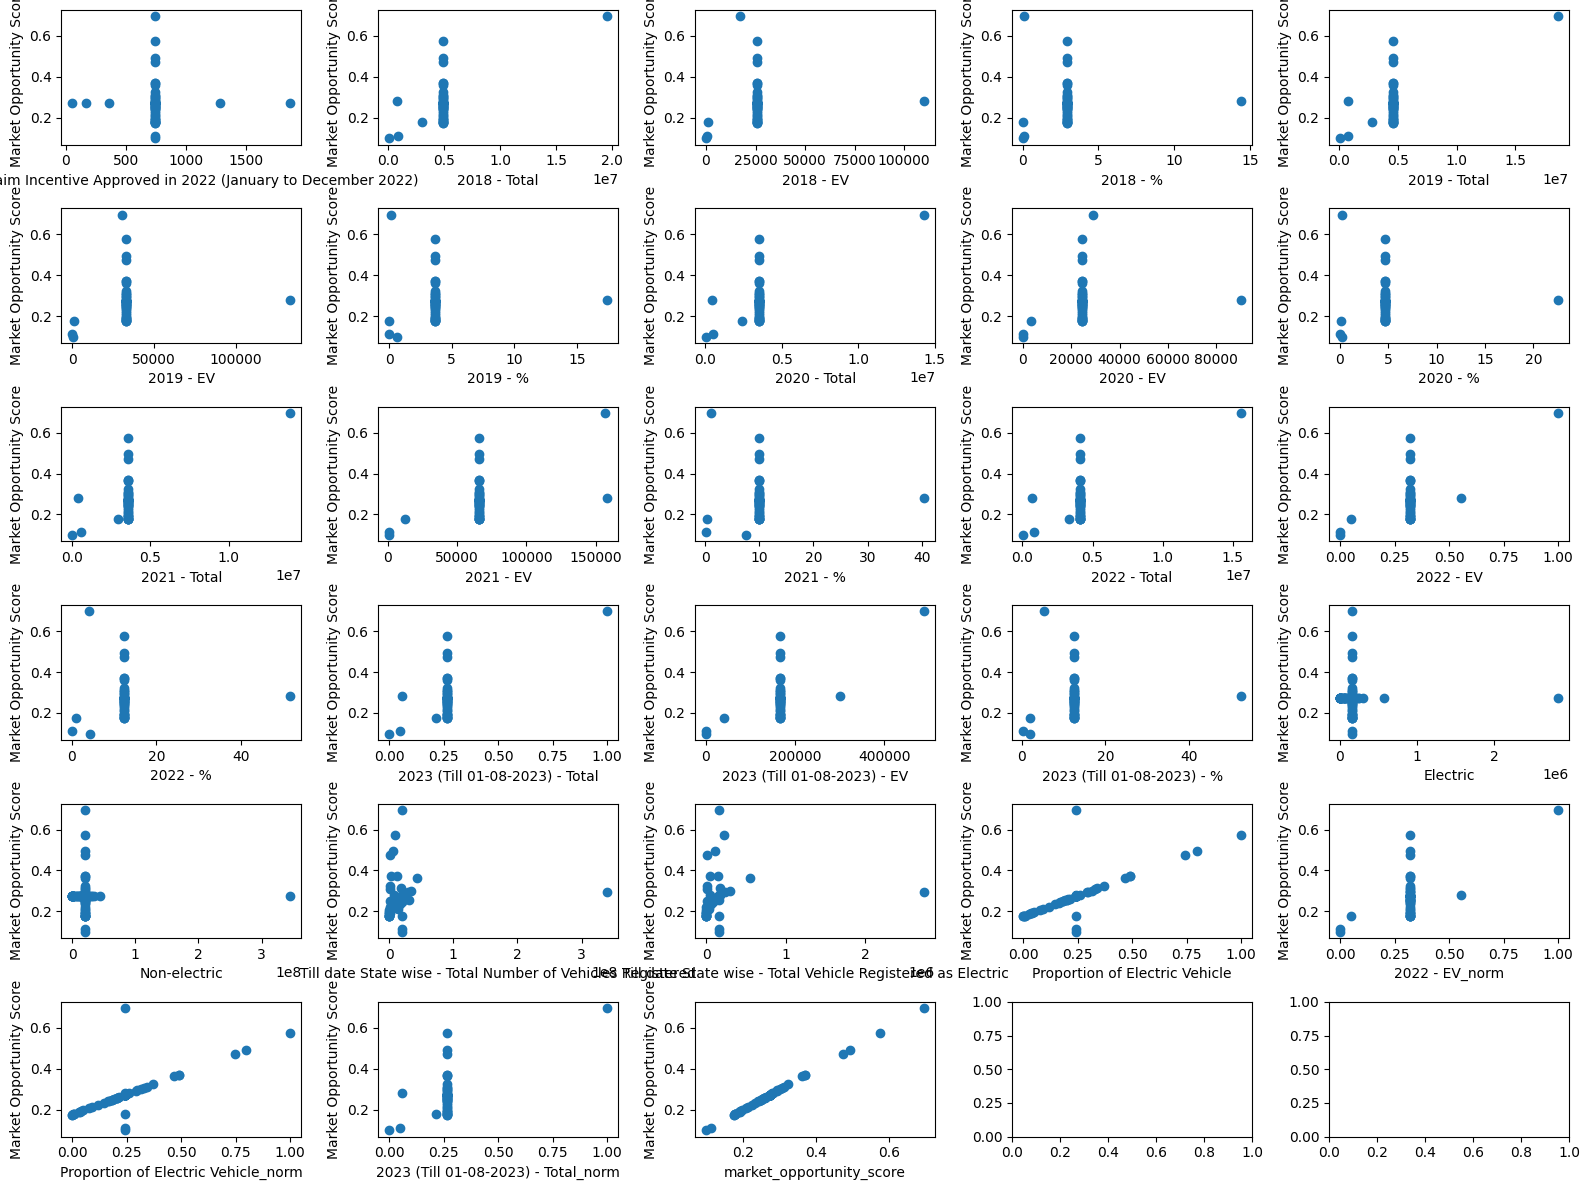

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Scatter plot of target variable vs. individual features
n_features = X.shape[1]
nrows = math.ceil(math.sqrt(n_features))
ncols = math.ceil(n_features / nrows)
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 12))

for i, col_name in enumerate(X.columns):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    ax.scatter(X[col_name], y)
    ax.set_xlabel(col_name)
    ax.set_ylabel('Market Opportunity Score')

plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

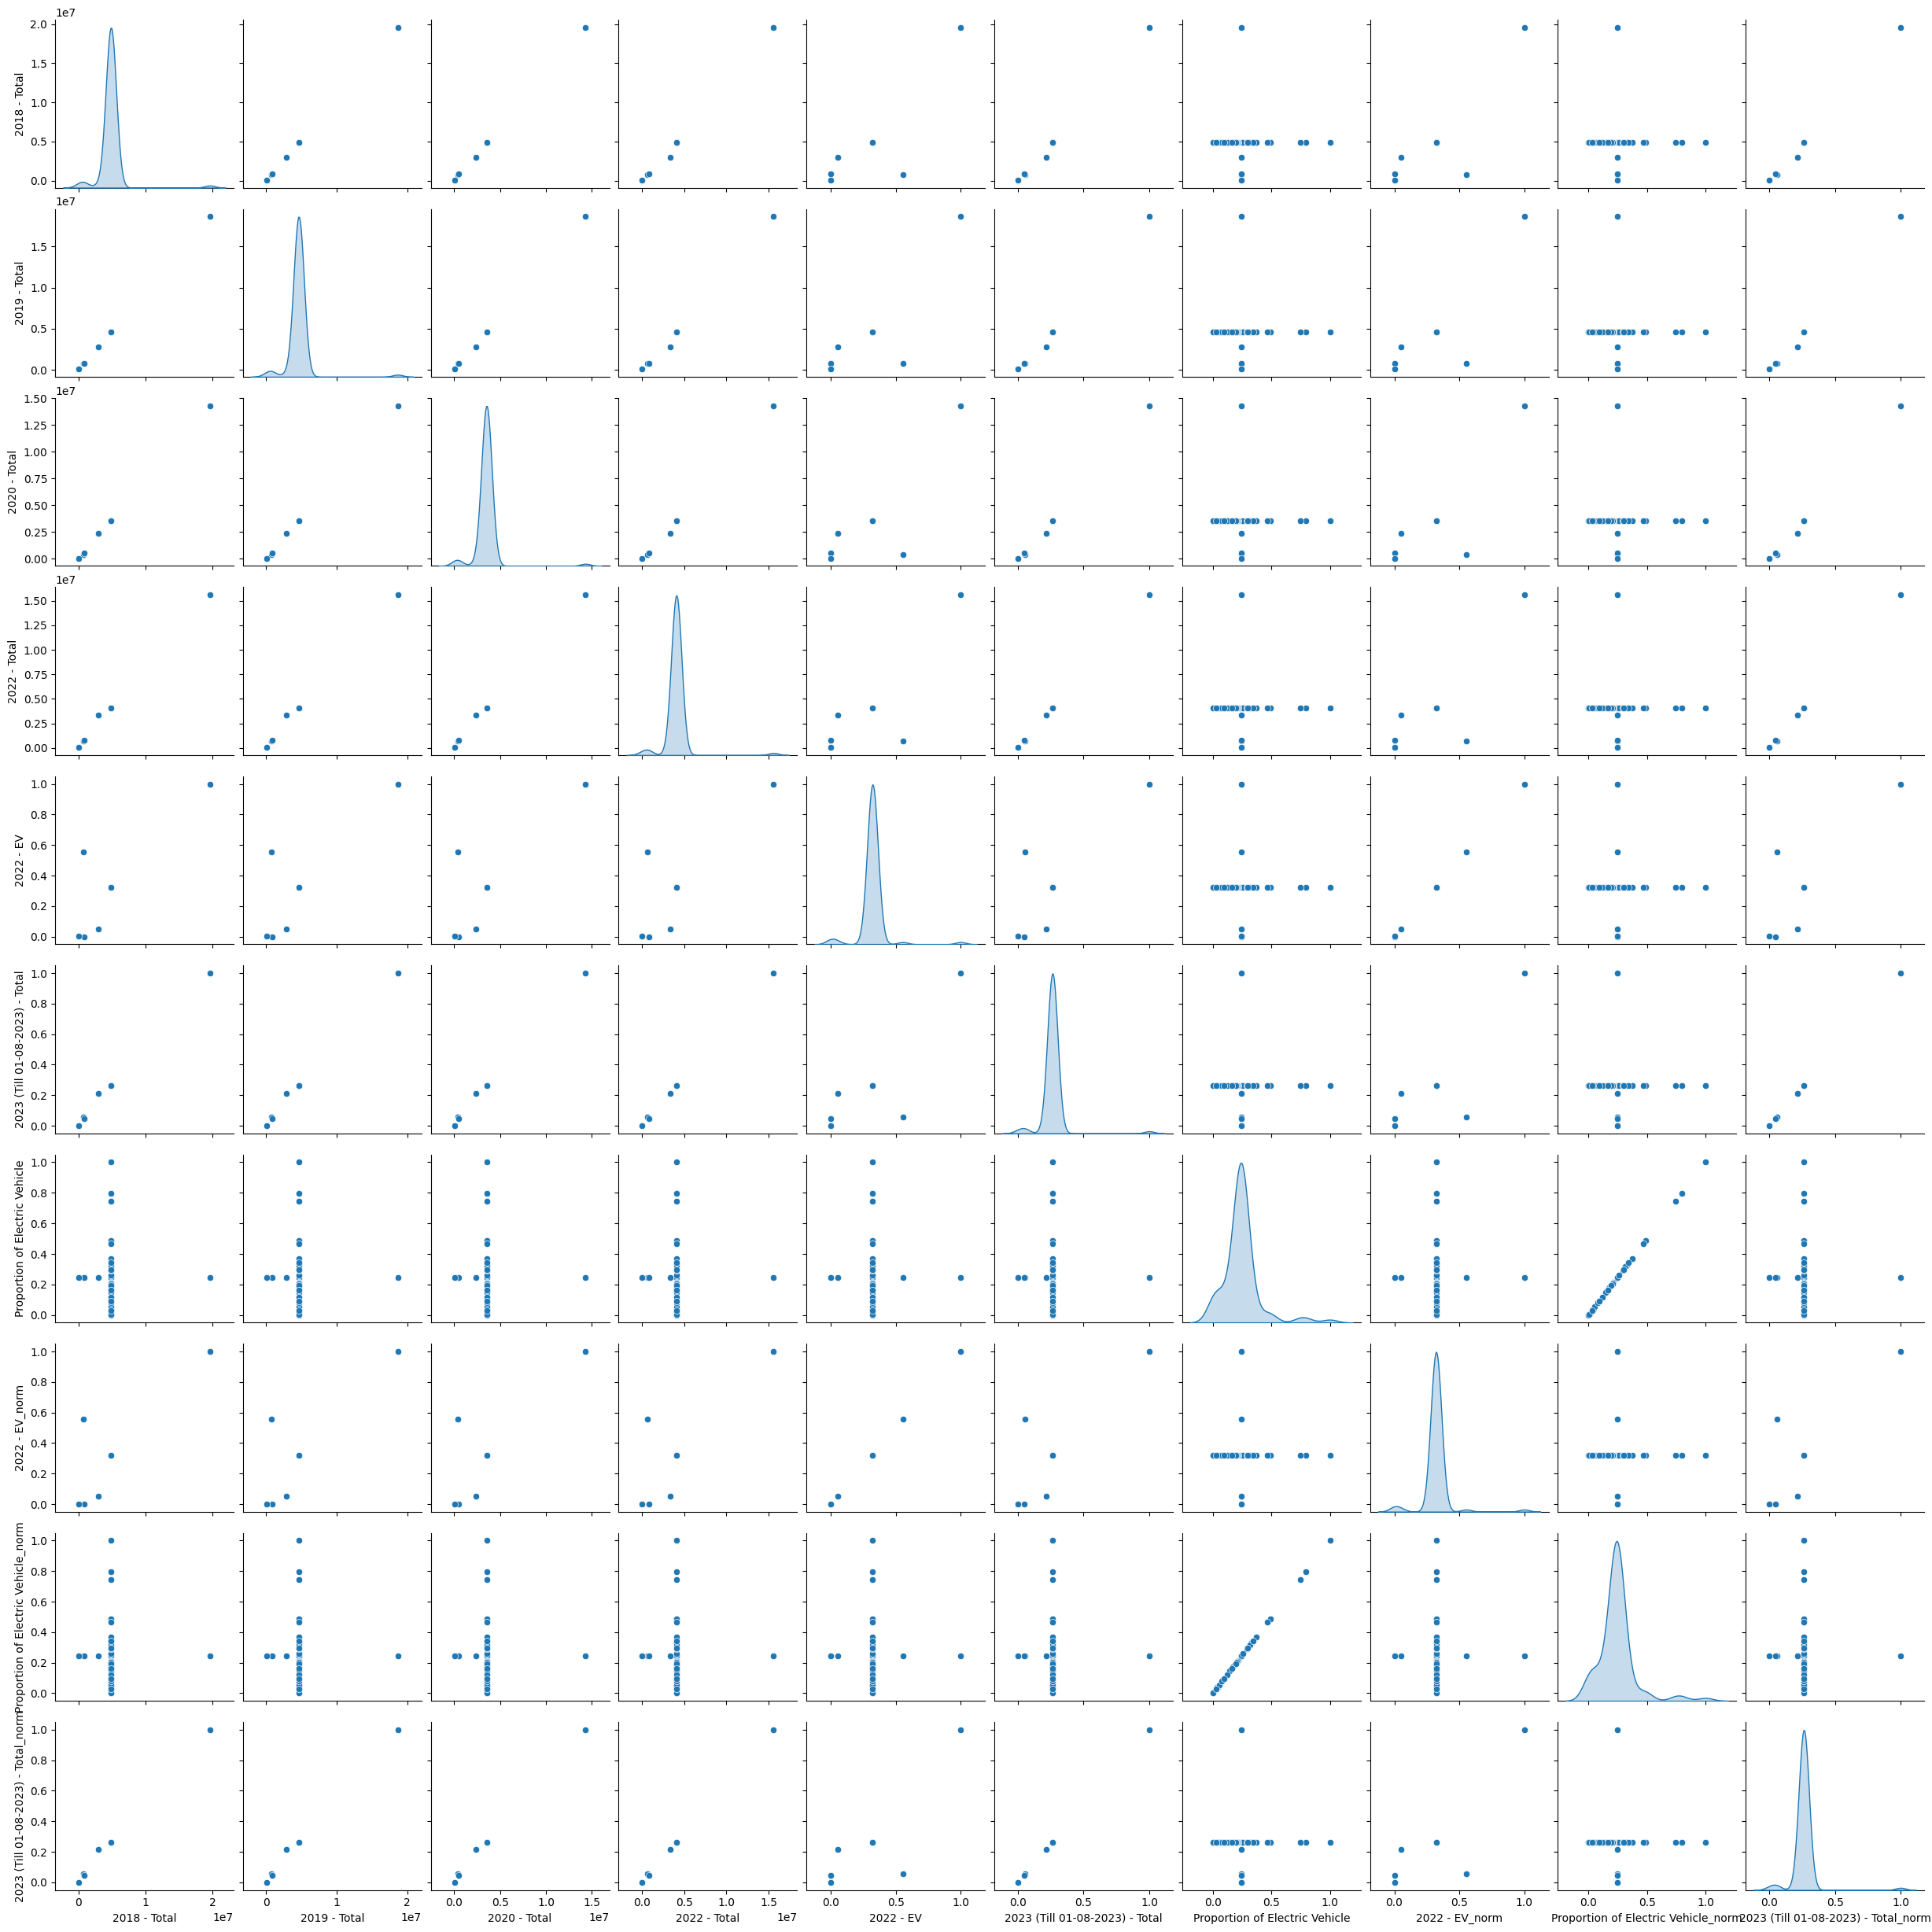

In [32]:
# Pairplot for top features
top_features = X.columns[selector.get_support()]
plt.figure(figsize=(12, 10))
sns.pairplot(data[top_features], diag_kind='kde')
plt.show()

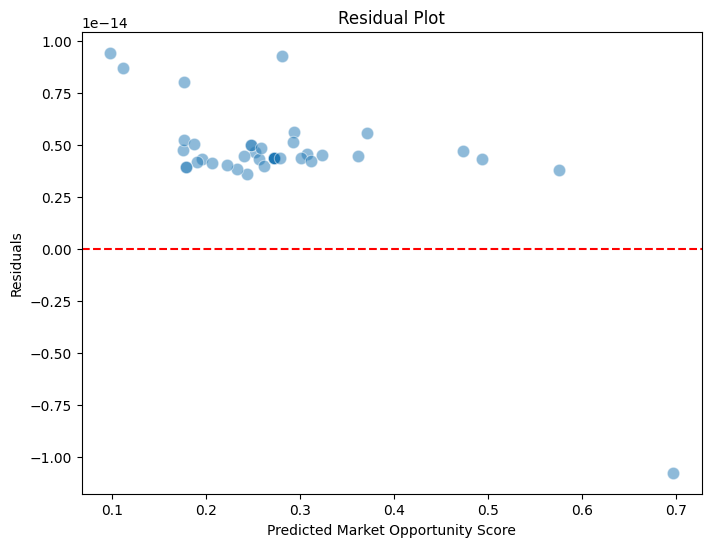

In [34]:
# Residual plot (Corrected using scatterplot)
y_pred_train = model.predict(X_train)
residuals = y_train - y_pred_train
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_train, y=residuals, s=80, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Market Opportunity Score')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='dashed')  # Add a horizontal line at y=0
plt.show()